In [148]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [149]:
%matplotlib inline

In [128]:
m = n = l = 4 # L of square grid

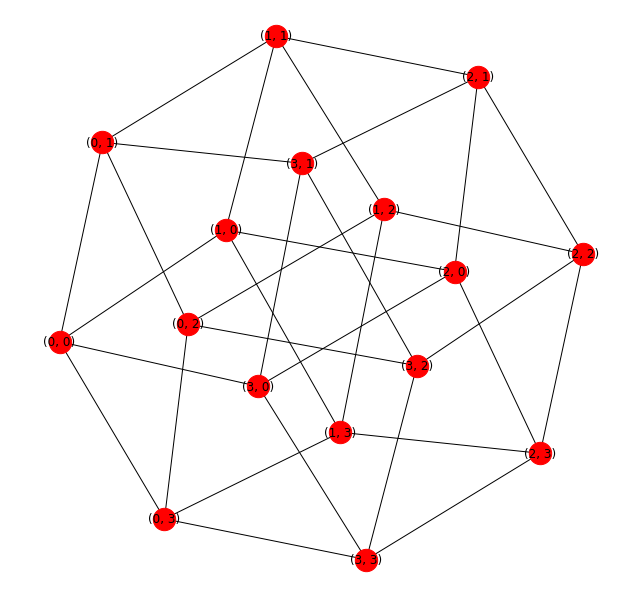

In [129]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [130]:
tree = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -4.74e-07 M: -1.19e-17 S: 0.693
beta: 0.1, Fe: -6.955 Energy: -0.0474 M: -8.32e-18 S: 0.691
beta: 0.2, Fe: -3.513 Energy: -0.0949 M: -3.7e-18 S: 0.684
beta: 0.3, Fe: -2.382 Energy: -0.142 M: 1.74e-18 S: 0.672
beta: 0.4, Fe: -1.828 Energy: -0.19 M: 9.84e-19 S: 0.655
beta: 0.5, Fe: -1.505 Energy: -0.238 M: -7.01e-18 S: 0.634
beta: 0.6, Fe: -1.298 Energy: -0.284 M: -1.17e-17 S: 0.608
beta: 0.7, Fe: -1.156 Energy: -0.33 M: -1.09e-17 S: 0.578
beta: 0.8, Fe: -1.056 Energy: -0.374 M: 2.24e-17 S: 0.545
beta: 0.9, Fe: -0.982 Energy: -0.415 M: 8.72e-18 S: 0.511
beta: 1.0, Fe: -0.927 Energy: -0.452 M: 6.29e-18 S: 0.475
beta: 1.1, Fe: -0.886 Energy: -0.486 M: 1.4e-18 S: 0.44
beta: 1.2, Fe: -0.854 Energy: -0.515 M: -4.36e-18 S: 0.407
beta: 1.3, Fe: -0.829 Energy: -0.539 M: -3.72e-18 S: 0.376
beta: 1.4, Fe: -0.809 Energy: -0.56 M: -7.43e-19 S: 0.348
beta: 1.5, Fe: -0.793 Energy: -0.578 M: 7.4e-18 S: 0.323
beta: 1.6, Fe: -0.780 Energy: -0.592 M: -1.14e-17 S: 0.301
b

In [131]:
res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.189 std_fe: 6.28E-02 M: -0.000 S: 0.693 E: 0.002
fe: -6.955 std_fe: 6.51E-03 M: 0.001 S: 0.691 E: -0.046
fe: -3.513 std_fe: 1.27E-02 M: -0.003 S: 0.684 E: -0.093
fe: -2.381 std_fe: 1.86E-02 M: 0.001 S: 0.672 E: -0.140
fe: -1.827 std_fe: 2.36E-02 M: 0.004 S: 0.656 E: -0.186
fe: -1.503 std_fe: 2.84E-02 M: -0.002 S: 0.637 E: -0.228
fe: -1.293 std_fe: 3.23E-02 M: 0.007 S: 0.615 E: -0.269
fe: -1.150 std_fe: 3.50E-02 M: -0.007 S: 0.588 E: -0.310
fe: -1.048 std_fe: 3.77E-02 M: -0.003 S: 0.559 E: -0.350
fe: -0.972 std_fe: 3.97E-02 M: 0.004 S: 0.527 E: -0.386
fe: -0.915 std_fe: 4.06E-02 M: -0.000 S: 0.497 E: -0.419
fe: -0.872 std_fe: 4.17E-02 M: 0.000 S: 0.463 E: -0.451
fe: -0.838 std_fe: 4.23E-02 M: 0.004 S: 0.433 E: -0.477
fe: -0.811 std_fe: 4.19E-02 M: 0.004 S: 0.399 E: -0.505
fe: -0.790 std_fe: 3.99E-02 M: 0.001 S: 0.365 E: -0.529
fe: -0.773 std_fe: 3.43E-02 M: 0.004 S: 0.320 E: -0.560
fe: -0.761 std_fe: 2.76E-02 M: -0.002 S: 0.277 E: -0.587
fe: -0.751 std_fe: 2.20E-02 M: 0.003 

In [132]:
res_nn_z2 = solvers.nn_sol(tree, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -693151.591 std_fe: 2.07E+02 M: -0.001 S: 0.693 E: 0.001
fe: -6.955 std_fe: 6.13E-03 M: 0.004 S: 0.691 E: -0.047
fe: -3.513 std_fe: 1.03E-02 M: -0.003 S: 0.684 E: -0.094
fe: -2.382 std_fe: 1.39E-02 M: 0.001 S: 0.672 E: -0.142
fe: -1.827 std_fe: 1.77E-02 M: -0.001 S: 0.656 E: -0.188
fe: -1.504 std_fe: 2.08E-02 M: -0.004 S: 0.636 E: -0.232
fe: -1.296 std_fe: 2.20E-02 M: 0.005 S: 0.609 E: -0.282
fe: -1.154 std_fe: 2.27E-02 M: -0.000 S: 0.582 E: -0.323
fe: -1.053 std_fe: 2.30E-02 M: -0.002 S: 0.546 E: -0.370
fe: -0.979 std_fe: 2.10E-02 M: 0.000 S: 0.512 E: -0.411
fe: -0.925 std_fe: 1.94E-02 M: 0.005 S: 0.473 E: -0.452
fe: -0.883 std_fe: 1.78E-02 M: 0.001 S: 0.434 E: -0.488
fe: -0.851 std_fe: 1.60E-02 M: -0.001 S: 0.401 E: -0.517
fe: -0.826 std_fe: 1.45E-02 M: -0.000 S: 0.369 E: -0.543
fe: -0.807 std_fe: 1.28E-02 M: 0.005 S: 0.340 E: -0.564
fe: -0.791 std_fe: 1.21E-02 M: 0.002 S: 0.319 E: -0.579
fe: -0.778 std_fe: 1.06E-02 M: -0.006 S: 0.294 E: -0.595
fe: -0.768 std_fe: 9.73E-03 M: -0.0

In [133]:
res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.955, ener: -0.047, M: 0.000, iter 1
fe: -3.513, ener: -0.094, M: 0.000, iter 1
fe: -2.381, ener: -0.140, M: 0.000, iter 1
fe: -1.827, ener: -0.186, M: 0.000, iter 1
fe: -1.503, ener: -0.229, M: 0.000, iter 1
fe: -1.294, ener: -0.271, M: 0.000, iter 1
fe: -1.151, ener: -0.311, M: 0.000, iter 1
fe: -1.048, ener: -0.350, M: 0.000, iter 1
fe: -0.973, ener: -0.386, M: 0.000, iter 1
fe: -0.916, ener: -0.420, M: 0.000, iter 1
fe: -0.872, ener: -0.451, M: 0.000, iter 1
fe: -0.838, ener: -0.481, M: 0.000, iter 1
fe: -0.812, ener: -0.509, M: 0.000, iter 1
fe: -0.791, ener: -0.534, M: 0.000, iter 1
fe: -0.775, ener: -0.558, M: 0.000, iter 1
fe: -0.762, ener: -0.580, M: 0.000, iter 1
fe: -0.752, ener: -0.600, M: 0.000, iter 1
fe: -0.744, ener: -0.619, M: 0.000, iter 1
fe: -0.738, ener: -0.636, M: 0.000, iter 1
fe: -0.733, ener: -0.651, M: 0.000, iter 1


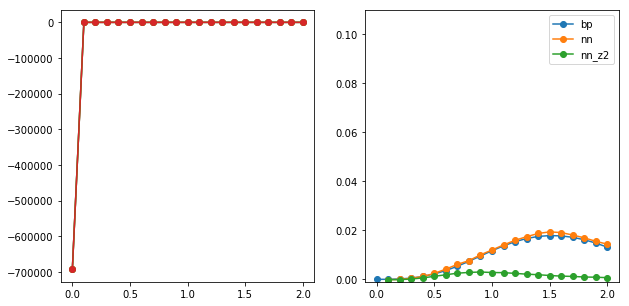

In [137]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.ylim(-0.001,0.11)
plt.show()

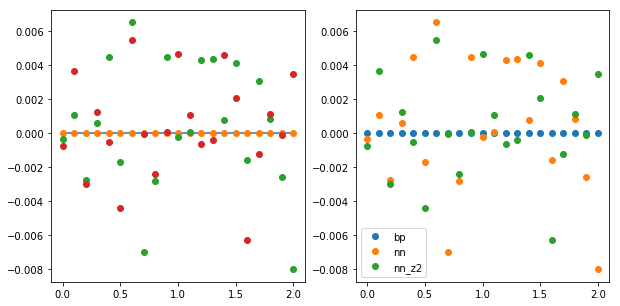

In [139]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

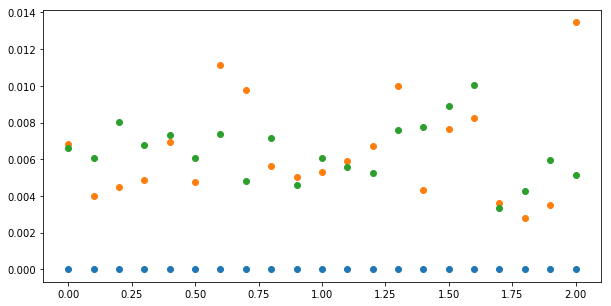

In [142]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

# With random field

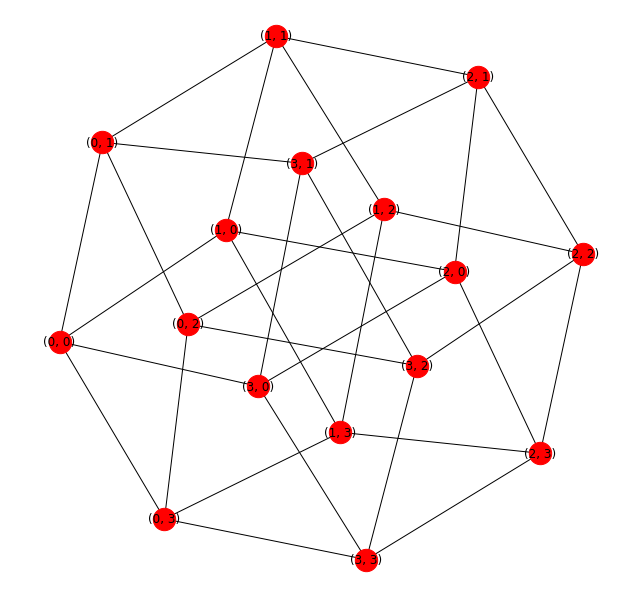

In [144]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

H = np.random.random(N)
#H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [146]:
tree = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(tree, betas_fast)
res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"
res_nn_z2 = solvers.nn_sol(tree, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"
res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

beta: 0.0, Fe: -693147.181 Energy: -6.19e-07 M: 5.4e-07 S: 0.693
beta: 0.1, Fe: -6.962 Energy: -0.0617 M: 0.0539 S: 0.69
beta: 0.2, Fe: -3.527 Energy: -0.123 M: 0.107 S: 0.681
beta: 0.3, Fe: -2.403 Energy: -0.184 M: 0.16 S: 0.666
beta: 0.4, Fe: -1.856 Energy: -0.244 M: 0.212 S: 0.645
beta: 0.5, Fe: -1.539 Energy: -0.303 M: 0.261 S: 0.618
beta: 0.6, Fe: -1.338 Energy: -0.359 M: 0.306 S: 0.587
beta: 0.7, Fe: -1.202 Energy: -0.411 M: 0.346 S: 0.553
beta: 0.8, Fe: -1.106 Energy: -0.458 M: 0.38 S: 0.518
beta: 0.9, Fe: -1.036 Energy: -0.499 M: 0.408 S: 0.484
beta: 1.0, Fe: -0.984 Energy: -0.534 M: 0.429 S: 0.451
beta: 1.1, Fe: -0.945 Energy: -0.563 M: 0.446 S: 0.42
beta: 1.2, Fe: -0.914 Energy: -0.587 M: 0.458 S: 0.392
beta: 1.3, Fe: -0.890 Energy: -0.607 M: 0.467 S: 0.367
beta: 1.4, Fe: -0.870 Energy: -0.624 M: 0.474 S: 0.344
beta: 1.5, Fe: -0.854 Energy: -0.639 M: 0.478 S: 0.323
beta: 1.6, Fe: -0.841 Energy: -0.651 M: 0.482 S: 0.305
beta: 1.7, Fe: -0.830 Energy: -0.661 M: 0.484 S: 0.287
be

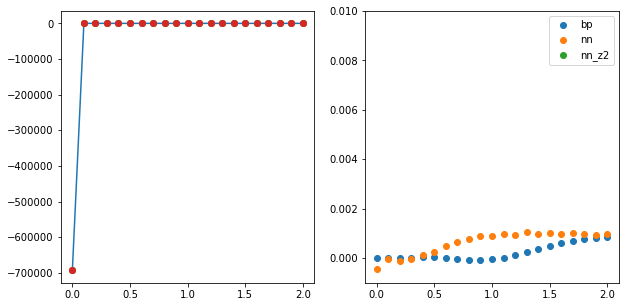

In [151]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.ylim(-0.001,0.01)
plt.show()

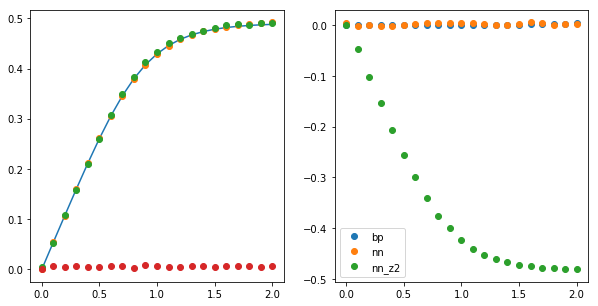

In [152]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

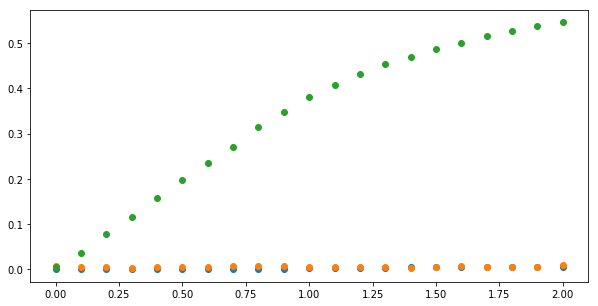

In [153]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()